Uncomment this cell if you're using in Colab'

In [1]:
#import os
#PARENT = os.path.dirname(os.getcwd())
#if not os.path.isdir(os.path.join(PARENT, '/palaeographic-variability-analysis-grandes-chroniques-fr-2813')):
#  !git clone https://github.com/malamatenia/palaeographic-variability-analysis-grandes-chroniques-fr-2813.git
#  %cd /content/palaeographic-variability-analysis-grandes-chroniques-fr-2813
#  !pip install -r requirements.txt

Cloning into 'palaeographic-variability-analysis-grandes-chroniques-fr-2813'...
remote: Enumerating objects: 40794, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 40794 (delta 27), reused 25 (delta 18), pack-reused 40742 (from 1)
Receiving objects: 100% (40794/40794), 2.90 GiB | 33.41 MiB/s, done.
Resolving deltas: 100% (473/473), done.
Updating files: 100% (38290/38290), done.
/content/palaeographic-variability-analysis-grandes-chroniques-fr-2813
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 89.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 6.4 MB/s eta 0:00:00
   ━━━━

In [2]:
#base imports
import os
from pathlib import Path
import rootutils
import sys

#visualisation imports
import matplotlib
import matplotlib.pyplot as plt

#LateX font style
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

plt.rcParams['text.usetex'] = False

In [3]:
root_path = Path(str(rootutils.find_root(search_from=os.getcwd(), indicator=".init_fr2813")))
sys.path.append(str(root_path / 'scripts' / 'utils'))
print(f"Root path: {root_path}")
from utils_pca import (
    pca_prototypes,
    pca_analysis,
    plot_pca_scatter,
    plot_pca_components,
    plot_pca_variations,
    show_images_by_component,
    explained_variance_plot
)

Root path: /content/palaeographic-variability-analysis-grandes-chroniques-fr-2813


In [4]:
prototype_folder = root_path / "results" / "prototypes" / "filtered"

transcribe_json_path = root_path / "results" / "prototypes" / "transcribe.json"

annotation_json_path = root_path / "data" / "processed_dataset" / "annotation.json"

pca_dir = root_path / "results" / "graphic_profiles_pca"

junicode_font_path = root_path / "Junicode.ttf"

### Build the PCA

The PCA calculation can be performed in **two modes**:
1. **“All” Mode**: PCA is applied to a combined set of characters.
2. **“Separate” Mode**: PCA is conducted individually for specific letters, providing a more granular analysis.

### Inputs Required:
- A list of Unicode character strings.
- The mode of PCA to be used (either “all” or “separate”).
- The annotation.json path.
- The folder containing the prototypes.
- The transcribe.json path (mapping of the characters to their index numbers)

Running PCA on all characters combined: ['a', 'd', 'g', 'm', 'o', 't']
Character range strings: ['26', '29', '32', '37', '39', '44']
Selected character suffixes: [26, 29, 32, 37, 39, 44]
Total folders processed: 70
Total folders processed: 70
PCA results saved for combined characters ['a', 'd', 'g', 'm', 'o', 't']
PCA scatter plot saved to /content/palaeographic-variability-analysis-grandes-chroniques-fr-2813/results/graphic_profiles_pca/combined/pca_scatter_combined.png


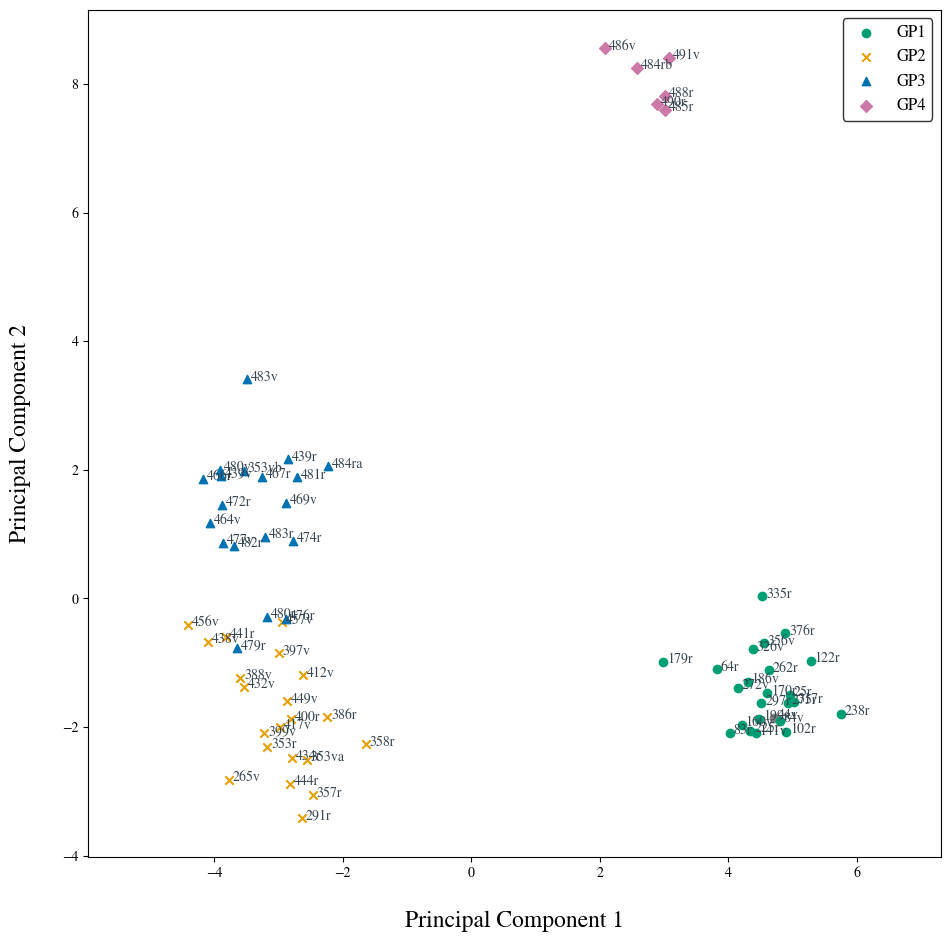

In [15]:
# Running the PCA analysis
result_combined = pca_analysis(
['a','d', 'g', 'm', 'o', 't'], #['a', 'b', 'c','d','e','f','g','h','m', 'n','o','p','q','r','s' 't','u']
'all',
prototype_folder,
annotation_json_path,
pca_dir,
transcribe_json_path
)

# The save path for combined results
save_path = result_combined['save_dir']
char = 'combined'

# Save the prototypes for the combined characters
plot_pca_scatter(
pca_result=result_combined['pca_model'].transform(result_combined['included_images']),  # PCA projections
included_labels=result_combined['included_labels'],
mapping=result_combined['folio_mapping'],
images=result_combined['included_images'],
image_shape=result_combined['image_shape'],
components=(0, 1),
save_path=os.path.join(save_path, f"pca_scatter_{char}.png"),
outliers=False,
protos=False,
annotation_json_path=annotation_json_path  # Pass annotation_json_path
)

## We now apply all of these functions to the chosen characters separately.

The results are saved in the `./results/graphic_profiles` folder, and correspond to all the Figures in Section 7.1.2 of the article.

In [16]:
def produce_results(char, result):
    save_path = result['save_dir']

    # Save the prototypes for each individual character
    pca_prototypes(result['included_images'], result['included_labels'], result['folio_mapping'], save_path=os.path.join(save_path, f"selected_pca_samples_{char}.png"))

    # Generate and save the explained variance plot for each character
    explained_variance_plot(result['pca_model'], result['included_labels'], result['folio_mapping'], char, save_path=save_path)

    # Plot and save the PCA components for each character
    plot_pca_components(
        mean_image=result['pca_model'].mean_,
        principal_components=result['pca_model'].components_[:4],
        explained_variance=result['pca_model'].explained_variance_ratio_[:4],
        image_shape=result['image_shape'],
        character=char,
        save_path=os.path.join(save_path, f"mean_and_components_{char}.png")
    )

    plot_pca_variations(
        mean_image=result['pca_model'].mean_,
        principal_components=result['pca_model'].components_[:4],
        explained_variance=result['pca_model'].explained_variance_ratio_[:4],
        image_shape=result['image_shape'],
        character=char,
        component_indices=[0, 1],
        save_path=save_path,
    )

    show_images_by_component(
        images=result['included_images'],
        labels=result['included_labels'],
        mapping=result['folio_mapping'],
        pca_result=result['pca_model'].transform(result['included_images']),
        component_index=(0, 1),
        save_path=os.path.join(save_path, f"{char}_sorted_by.png"),
        image_shape=result['image_shape'],
    )

    principal_components = result['pca_model'].components_[:4].reshape(-1, *result['image_shape'])
    plot_pca_scatter(
        pca_result=result['pca_model'].transform(result['included_images']),
        included_labels=result['included_labels'],
        mapping=result['folio_mapping'],
        images=result['included_images'],
        image_shape=result['image_shape'],
        components=(0, 1),
        save_path=os.path.join(save_path, f"pca_scatter_{char}.png"),
        outliers=True,
        protos=True,
        principal_components=principal_components,
        annotation_json_path=annotation_json_path
    )

In [17]:
CHARS = ['a', 'd', 'g', 'm', 'o', 't']
results_separate = pca_analysis(CHARS, 'separate', prototype_folder, annotation_json_path, pca_dir,transcribe_json_path=transcribe_json_path)

Running PCA separately for characters: ['a', 'd', 'g', 'm', 'o', 't']
Running PCA for character: a
Parsed image name: [26]
PCA results saved for character a
Running PCA for character: d
Parsed image name: [29]
PCA results saved for character d
Running PCA for character: g
Parsed image name: [32]
PCA results saved for character g
Running PCA for character: m
Parsed image name: [37]
PCA results saved for character m
Running PCA for character: o
Parsed image name: [39]
PCA results saved for character o
Running PCA for character: t
Parsed image name: [44]
PCA results saved for character t


Image saved to /content/palaeographic-variability-analysis-grandes-chroniques-fr-2813/results/graphic_profiles_pca/a/selected_pca_samples_a.png
Explained variance plot saved to /content/palaeographic-variability-analysis-grandes-chroniques-fr-2813/results/graphic_profiles_pca/a/explained_variance_plot_a.png
PCA components plot saved to /content/palaeographic-variability-analysis-grandes-chroniques-fr-2813/results/graphic_profiles_pca/a/mean_and_components_a.png
Full variation plot for PC1 saved to /content/palaeographic-variability-analysis-grandes-chroniques-fr-2813/results/graphic_profiles_pca/a/pc1_variations.png
Full variation plot for PC2 saved to /content/palaeographic-variability-analysis-grandes-chroniques-fr-2813/results/graphic_profiles_pca/a/pc2_variations.png
Images sorted by PC1 saved to /content/palaeographic-variability-analysis-grandes-chroniques-fr-2813/results/graphic_profiles_pca/a/a_sorted_by_PC1.png


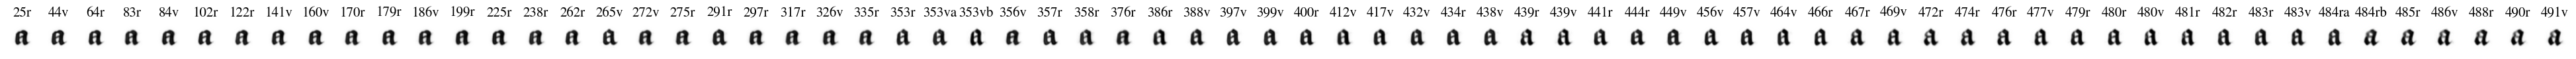

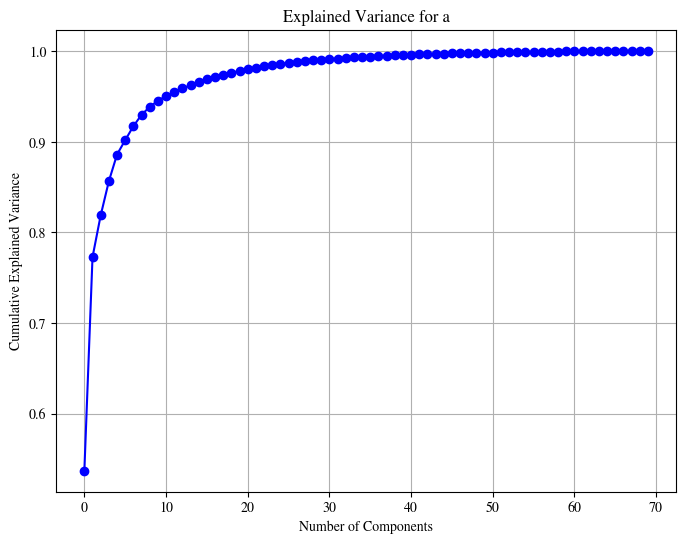

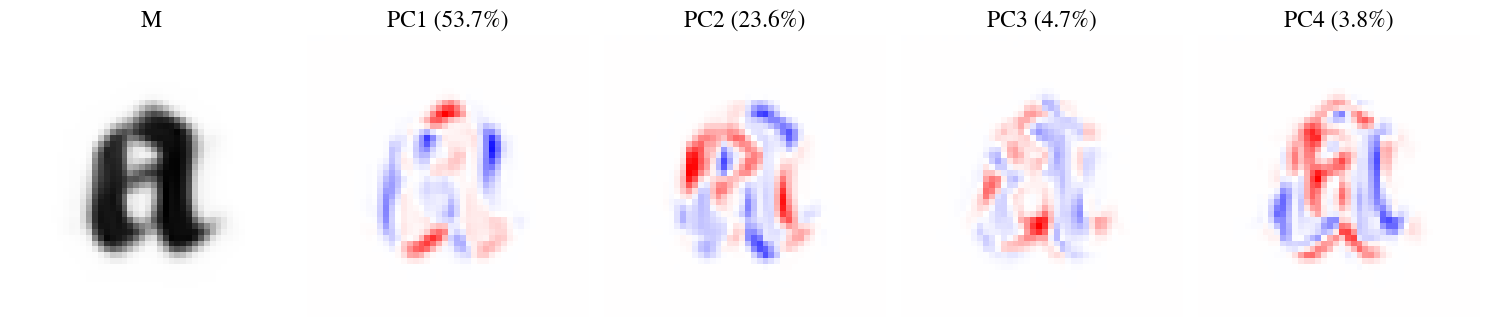

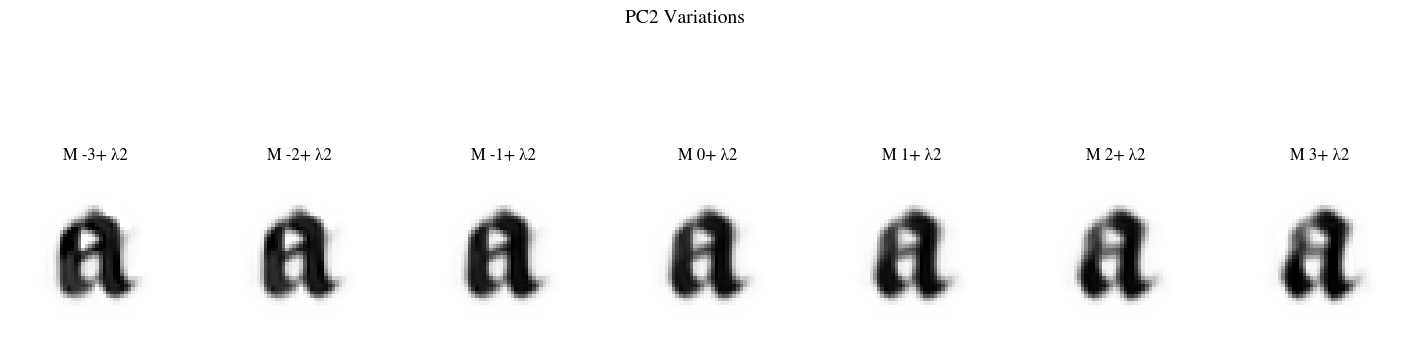

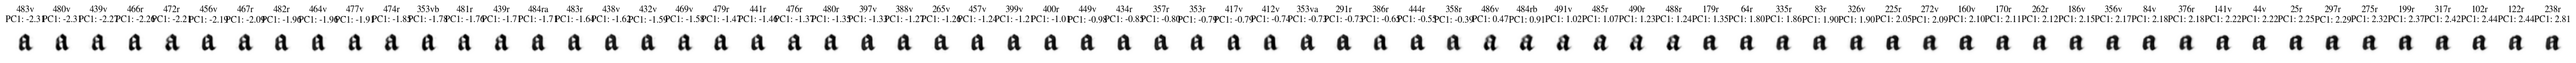

Images sorted by PC2 saved to /content/palaeographic-variability-analysis-grandes-chroniques-fr-2813/results/graphic_profiles_pca/a/a_sorted_by_PC2.png


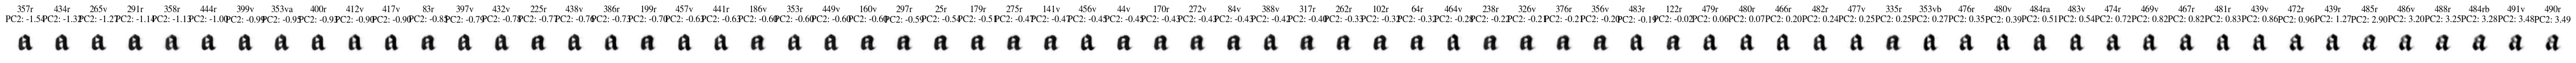

PCA scatter plot saved to /content/palaeographic-variability-analysis-grandes-chroniques-fr-2813/results/graphic_profiles_pca/a/pca_scatter_a.png


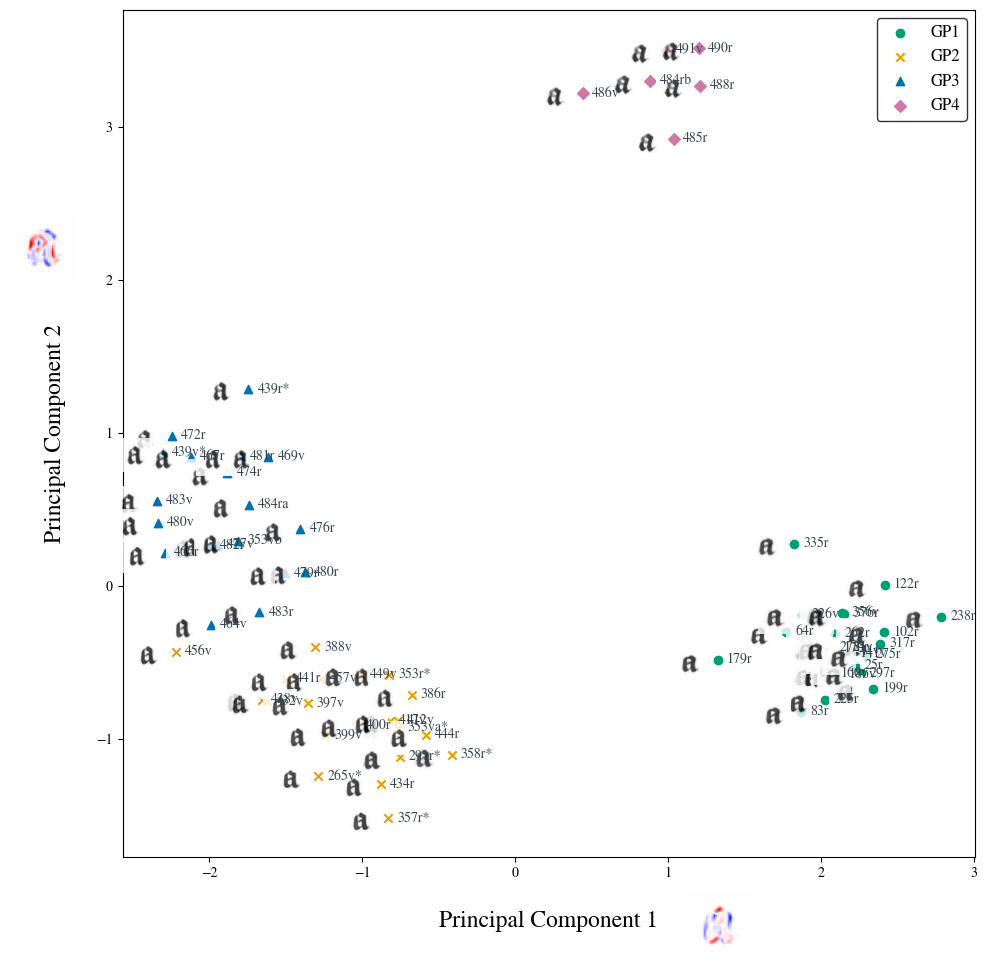

In [18]:
#@title Select character to produce results
c = "m"  #@param ['a', 'd', 'g', 'm', 'o', 't']
produce_results(c, results_separate[c])